### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2019
---

## Project Initial Report

## Project Title: Malian Demographics

## Student(s): Alpha DIallo

#### Date: 05/26/2019
---

#### Abstract
---
In this project I will work on the demographic Data of my country Mali by going gathering data on the evolution of the population throughout the years.

I will use different types of datasets for instance:
- The HTML article about the demographic data of Mali and the ecthnic groups details of Africa
https://www.worldometers.info/world-population/mali-population/
https://en.wikipedia.org/wiki/List_of_ethnic_groups_of_Africa

- The UN Csv and excel datasets regarding population growth, mortality and movement
https://population.un.org/wpp/Download/Standard/ ...


- A couple of conflicts, economics and other datasets as external factors that may evolve as the project continues to incorporate within my analysis
https://www.kaggle.com/jboysen/african-conflicts (CSV)
https://data.worldbank.org/country/mali (CSV)
https://www.kaggle.com/robertoberwa/conflicts-in-africa-from-19972018 (CSV)
https://data.worldbank.org/country/mali (Excel - CSV)

All of them won't be used of course, but I will make a visualisation of the data to make the demographic information of mali more readable.


### 1. Introduction

It's difficult to find information about Malian demographics in one place. All the data is scattered over different websites and databases that can be and certainly was a challenge (in this project).

So the main focus here will be to present the data in more understable state with graphs that represent how the country evolved in the years in terms of population and quality of life at a certain extent.

For that, I will use the different concept of data analysis with python and presenting data about the population's age, its natural change and some socio-economical aspect of it by year.


### 2. Problem Definition
---
*(Define the problem that will be solved in this data analytics project. Where does the problem come from? Who would be benefited from the solutions presented in this project? Use formal languages and notations to define the problem as much as possible.)*

Extending from the previous part, There isn't a specific problem that my project answers, but it is one that will help in the undertsnding of Malian demographics.

Making visual representation of combined data will help us understand thoroughly the different factors in population growth and movement. Some of the datasets contain predictions that doesn't take into account the more complicated factors such as political stability of a country. However, gathering them will make it easier to read for interrested people.

Understanding not only the political and economical factors, but also environmental ones is useful in any field related to people like medecine, psycology, sociology and many more.

### 3. Data Sources
---
*(Describe the origin of the data sources. What is the format of the original data? How to access the data?)*

As mentionned in the introduction, my dataset will be pretty varied with the main one being the UN dataset about population growth and the wikipedia Html page. 
From the others I will gather only the information I need to apply to a certain range of time.

- The HTML article about the demographic data of Mali and the ecthnic groups details of Africa
https://www.worldometers.info/world-population/mali-population/
https://en.wikipedia.org/wiki/List_of_ethnic_groups_of_Africa

- The UN Csv and excel datasets regarding population growth, mortality and movement
https://population.un.org/wpp/Download/Standard/ ...


- A couple of conflicts, economics and other datasets as external factors that may evolve as the project continues to incorporate within my analysis 
    https://www.kaggle.com/jboysen/african-conflicts (CSV)
    https://data.worldbank.org/country/mali (CSV)
    https://www.kaggle.com/robertoberwa/conflicts-in-africa-from-19972018 (CSV)
    https://data.worldbank.org/country/mali (Excel - CSV)

### 4. Other Things you Would Like to Describe
---
*(Is there anything you would like to describe as well? For example, preliminary analyses and results...)*

### 5. References
---
*(list the references you will use in the project.)*

- https://www.worldometers.info/world-population/mali-population/
- https://en.wikipedia.org/wiki/List_of_ethnic_groups_of_Africa
- https://population.un.org/wpp/Download/Standard/
- https://www.kaggle.com/jboysen/african-conflicts
- https://data.worldbank.org/country/mali
- https://www.kaggle.com/robertoberwa/conflicts-in-africa-from-19972018
- https://data.worldbank.org/country/mali

### 5. Acquiring and Loading Data

---

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

In [2]:
#the main dataset with all the data that I wanted to explore even if all of them aren't used
tables={'wikiDemo': pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Mali'),
       'world':pd.read_html('https://www.worldometers.info/world-population/mali-population/'),
       'ethnic':pd.read_html('https://en.wikipedia.org/wiki/List_of_ethnic_groups_of_Africa'),
       'conflict':pd.read_csv('./datasets/Africa97-18.csv'),
       'Economy': pd.read_csv('./datasets/Econ.csv'),
       'Schooling': pd.read_csv('./datasets/School.csv'),
       'Crime': pd.read_csv('./datasets/mali-crime-rate-statistics.csv')}


### 6. Cleaning, Visualization and Wrangling

---

In [3]:
#Population evolution and Predictions
popML = pd.concat([tables['world'][1], tables['world'][2]]).set_index('Year')
#population info
popML = popML.sort_values(by=['Year'])
popML

,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,MaliGlobal Rank
Year,,,,,,,,,,,,
1955,4975398,1.11 %,53394,-7006,20.1,6.95,4,9.4 %,469476,0.18 %,2772242535,69
1960,5263733,1.13 %,57667,-9814,19.5,6.95,4,10.7 %,564271,0.17 %,3033212527,70
1965,5568484,1.13 %,60950,-7006,20.1,6.95,5,12.2 %,677590,0.17 %,3339592688,69
1970,5949045,1.33 %,76112,-19647,18.8,7.10,5,13.8 %,819144,0.16 %,3700577650,75
1975,6482278,1.73 %,106647,-19117,18.5,7.15,5,15.5 %,1005660,0.16 %,4079087198,76
1980,7090126,1.81 %,121570,-35000,17.9,7.15,6,17.6 %,1244972,0.16 %,4458411534,77
1985,7831889,2.01 %,148353,-43613,17.4,7.15,6,19.9 %,1556052,0.16 %,4873781796,76
1990,8465188,1.57 %,126660,-96130,16.5,7.15,7,21.9 %,1857419,0.16 %,5330943460,79
1995,9604450,2.56 %,227852,-34698,16.5,7.15,8,23.9 %,2293838,0.17 %,5751474416,77


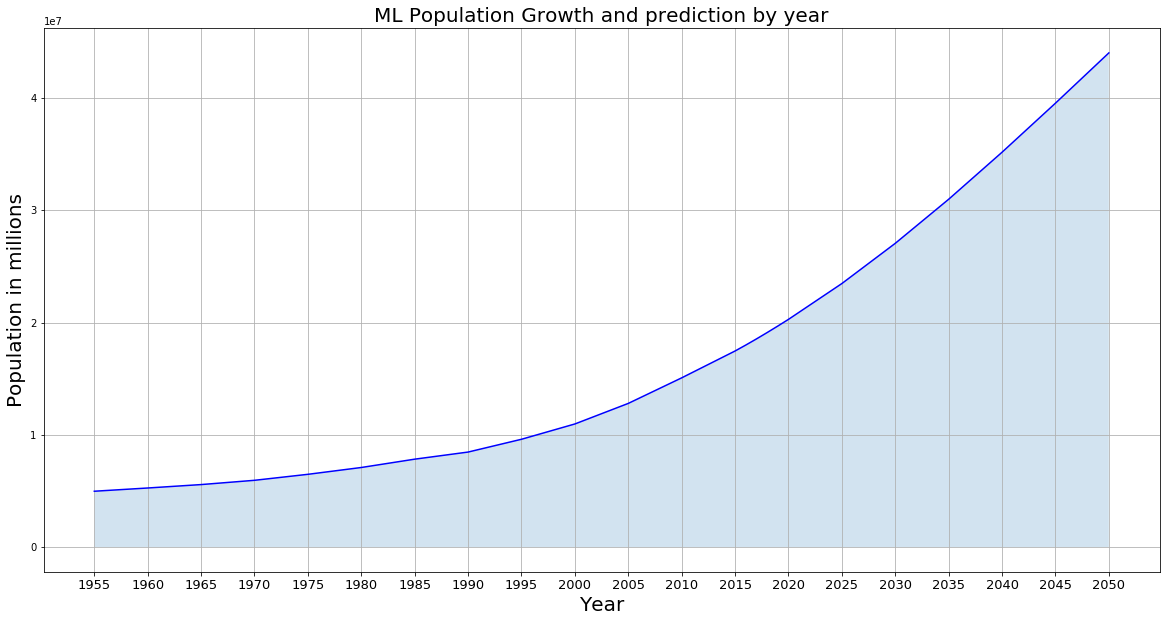

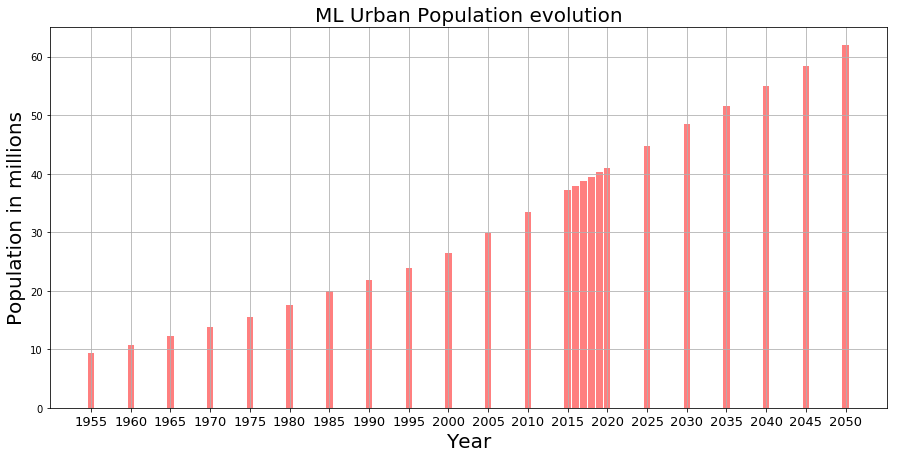

In [4]:
#ML Population Growth and prediction by year
plt.figure(figsize=(20,10))

x = popML.index
y = popML['Population']

plt.plot(x,y, color = 'blue')
plt.fill_between(x, 0, y, alpha=.2)

plt.title('ML Population Growth and prediction by year', fontsize = 20)
plt.xlabel("Year", fontsize = 20)

    #arranging the x axes' range
plt.xticks(np.arange(min(x), max(x)+5, 5), fontsize = 13)

plt.ylabel("Population in millions", fontsize = 20)
plt.grid(True)
plt.show()


    #Normalizing the Urban Pop % first, by rending it float without changing the dataframe
popML = popML.replace(to_replace=r'\s%', value='', regex=True)
y=pd.Series(popML['Urban Pop %'].tolist(), dtype='float')

#ML Urban Population evolution
plt.figure(figsize=(15,7))

plt.bar(x,y,color = 'red', alpha=0.5)
plt.title('ML Urban Population evolution', fontsize = 20)
plt.xlabel("Year", fontsize = 20)

    #arranging the x axes' range
plt.xticks(np.arange(min(x), max(x)+5, 5), fontsize = 13)

plt.ylabel("Population in millions", fontsize = 20)
plt.grid(True)
plt.show()


Those two graphs show the evolution of coutry's and specificly urban population throughout the years. They used linear prediction with the fertility rate and previous data point to predict future changes in population.
It might not be taking that many different factors into account, but I think it is a good bases for this project.

Of course population growth is stable as fortunatly Mali has never underwent a big disaster like a war or genocide.
Moving on the urban population is of course growing as even people deep inside the country are pursuing opportunities that cities offer.

In [5]:
#Population age ranges
pRange = tables['wikiDemo'][0][1:]
    #replacing the columns
pRange.columns = ['Year', 'Population', '0-14', '15-64', '65+']
    #parsing to float for plotting
y1=pd.Series(pRange['0-14'].tolist(), dtype='float')
y2=pd.Series(pRange['15-64'].tolist(), dtype='float')
y3=pd.Series(pRange['65+'].tolist(), dtype='float')

pRange

,Year,Population,0-14,15-64,65+
1,1950.0,4 638 000,38.9,58.3,2.8
2,1955.0,4 928 000,40.1,57.4,2.5
3,1960.0,5 248 000,40.5,57.2,2.3
4,1965.0,5 597 000,41.5,56.2,2.3
5,1970.0,6 034 000,42.3,55.2,2.4
6,1975.0,6 604 000,43.3,54.1,2.6
7,1980.0,7 246 000,44.6,52.6,2.8
8,1985.0,8 010 000,45.8,51.3,2.9
9,1990.0,8 673 000,47.5,49.5,3.0
10,1995.0,9 825 000,47.4,49.9,2.8


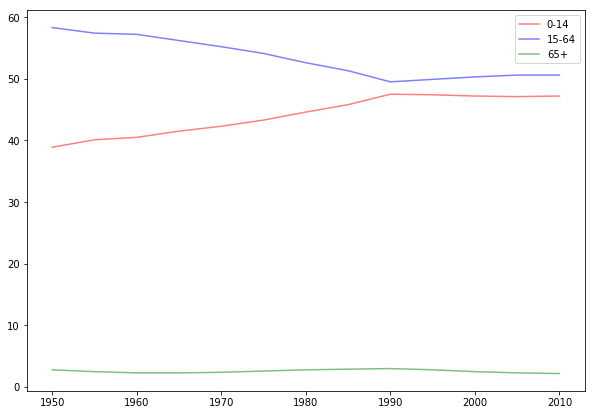

In [6]:
#Plotting the previous population range data
plt.figure(figsize=(10,7))
plt.plot(pRange.Year, y1, alpha=0.5, label='0-14', color='red')
plt.plot(pRange.Year, y2, alpha=0.5, label='15-64', color='blue')
plt.plot(pRange.Year, y3, alpha=0.5, label='65+', color='green')
plt.legend()

plt.show()

Here we have the age range evolution until 2010. The coup in 1991 is one of the main factors of the regulation of of the rate as all economics and politics stabilized, people also stabilized their lifes.
Of course as more and more people live in a country, the natural change rate will raise as we will see in the next graph. But the proportion in age stayed more or less the same.

In [7]:
#Natural change
nEvolution = tables['wikiDemo'][5][1:-1] #getting rid of unconsistent lines

nEvolution.columns = ['Period', 'Live births per year', 'Deaths per year', 'Natural change per year','CBR*', 'CDR*', 'NC*', 'TFR*', 'IMR*' ]
nEvolution = nEvolution.set_index('Period')

    #Normalizing the data first
nEvolution = nEvolution.replace(to_replace=r'\s', value='', regex=True)

nEvolution

,Live births per year,Deaths per year,Natural change per year,CBR*,CDR*,NC*,TFR*,IMR*
Period,,,,,,,,
1950-1955,231000,166000,65000,48.4,34.7,13.6,6.48,175
1955-1960,248000,175000,74000,48.8,34.3,14.5,6.65,173
1960-1965,266000,182000,84000,49.1,33.7,15.5,6.75,168
1965-1970,287000,180000,107000,49.4,31.0,18.4,6.87,162
1970-1975,312000,179000,133000,49.3,28.3,21.1,6.93,156
1975-1980,343000,179000,163000,49.5,25.9,23.6,7.01,149
1980-1985,377000,181000,196000,49.4,23.7,25.8,7.07,141
1985-1990,408000,179000,229000,48.9,21.5,27.4,7.09,135
1990-1995,450000,185000,265000,48.7,20.1,28.7,7.01,127


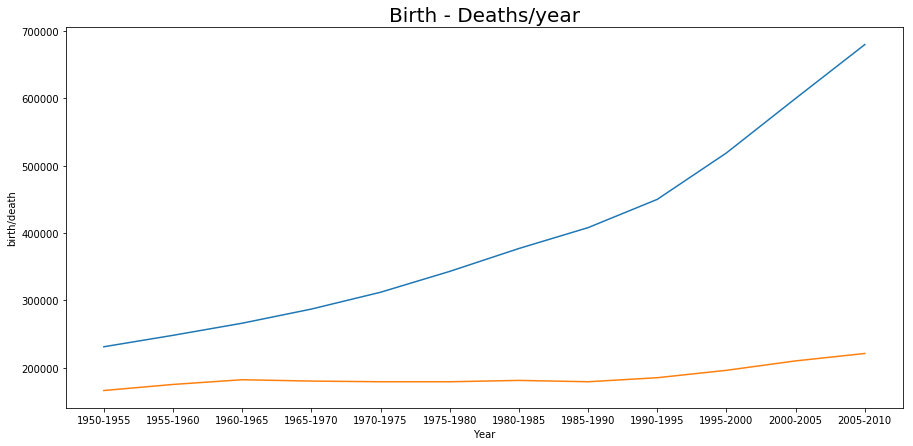

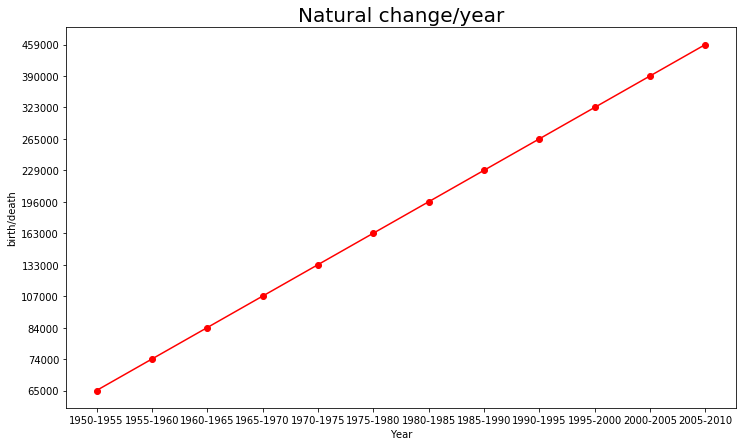

In [8]:
#Plotting the previous data on Natural change
df = nEvolution
fig = plt.figure(figsize = (15, 7))

x = df.index

#parsing to int for plotting the birth and death rate
y1=pd.Series(df['Live births per year'].tolist(), dtype='int32')
y2=pd.Series(df['Deaths per year'].tolist(), dtype='int32')

plt.plot(x,y1)
plt.plot(x,y2)
plt.title('Birth - Deaths/year', fontsize=20)
plt.xlabel("Year")
plt.ylabel("birth/death")

plt.show()

#plotting the natural change

plt.figure(figsize = (12, 7))
plt.plot(df.index,df['Natural change per year'], marker = 'o', color = 'red')
plt.title('Natural change/year', fontsize=20)
plt.xlabel("Year")
plt.ylabel("birth/death")

plt.show()

As said before, the ammount of people in a coutry define the natural change. Even though the death rate seems to be proggressing. we will see on the next few graphs that quality of life improved to a point in the 2000s.

In [9]:
#crime rate
Crime_rate = tables['Crime'].set_index('Year')
Crime_rate.columns = ['Per 100K', 'Yearly change']
Crime_rate

,Per 100K,Yearly change
Year,,
2005,12.6846,-1.550
2006,12.7999,1.010
2007,13.0023,1.020
2009,12.3099,-0.050
2010,12.1799,-0.050
2011,12.0000,-0.050
2012,21.0594,1.745
2013,30.9654,1.470
2014,24.5423,-0.210


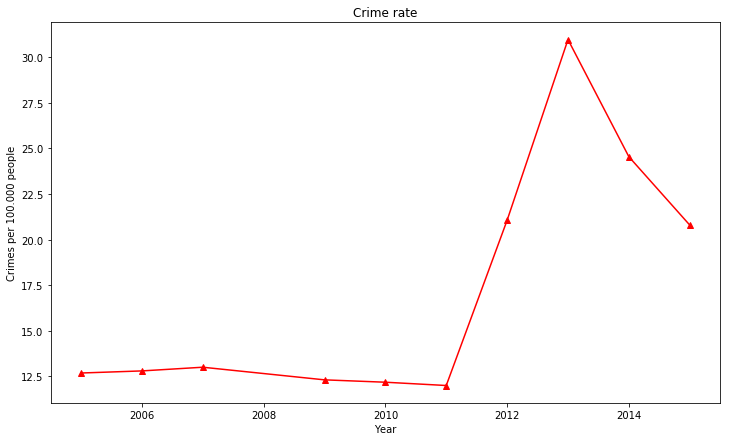

In [10]:
#Plotting crime rate
plt.figure(figsize = (12, 7))
plt.plot(Crime_rate.index, Crime_rate['Per 100K'], marker = '^', color = 'red')
plt.title('Crime rate')
plt.xlabel("Year")
plt.ylabel("Crimes per 100.000 people")

plt.show()

Crime rate in Mali has always been low in the 2000s. The instability brought by the terrorists crisis in the north that started in 2011, made everything worse.
Instability only brings chaos, and we can see that in the graph as crime peaked in 2013. Since then things are setling down, and crime is dropping by the year.

In [11]:
#Schooling data
SC = tables['Schooling'][5:7]
    #getting rid of unneded columns
SC = SC.filter(regex=("(Series$|[0-9]+.*)"))
SC.set_index('Series')
    #renaming columns for plotting
SC.columns = range(1970, 2037)
SC.dropna()

#transposing for plotting
SC = SC.T
SC.columns = ['Children out of shool', 'Primary school completion']
SC = SC[1:]
#deleting emoty fields
SC = SC[ SC['Children out of shool'] != r'..']
SC

,Children out of shool,Primary school completion
1972,722187,10.05257
1973,727682,9.23434
1974,740030,9.6107
1975,734796,10.36502
1978,780428,13.81914
2000,960028,..
2003,901491,35.95749
2004,930189,38.97694
2005,959909,40.76734
2006,887424,42.1615


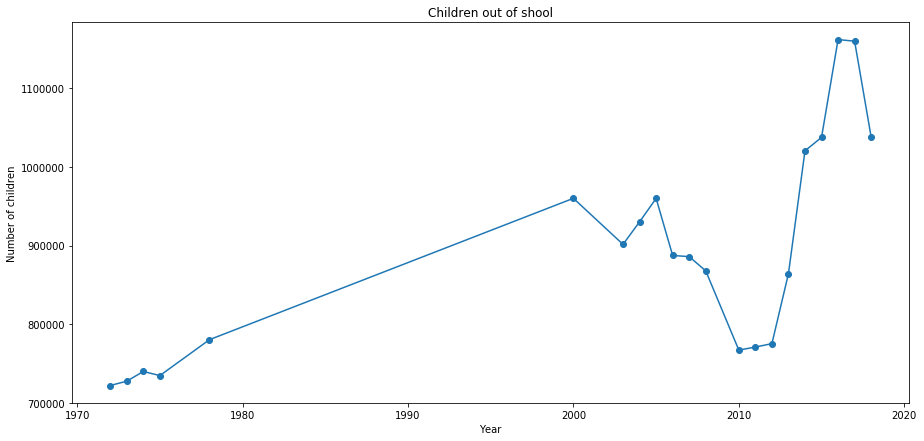

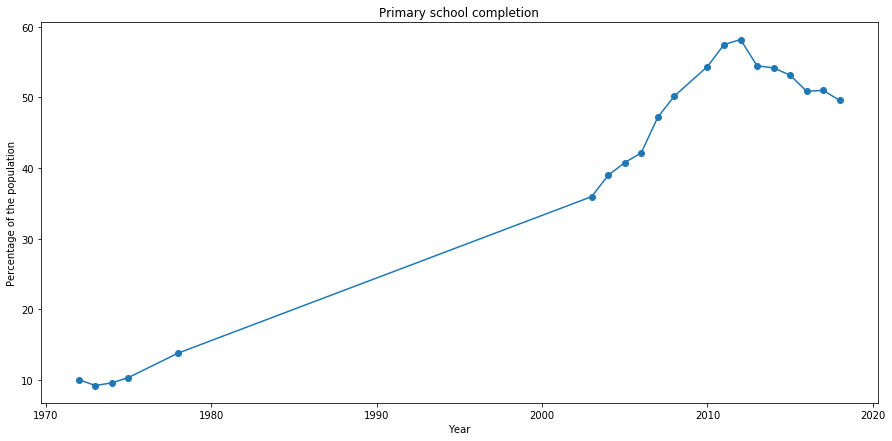

In [12]:
#Plotting Schooling
fig = plt.figure(figsize = (15, 7))

x = SC.index
    #Parsing to float
y1=pd.Series(SC['Children out of shool'].tolist(), dtype='float')

plt.plot(x,y1, marker = 'o')
plt.title('Children out of shool')
plt.xlabel("Year")
plt.ylabel("Number of children")
plt.show()

    #deleting rows specific to Primary schooling with less datapoints
SC = SC[ SC['Primary school completion'] != r'..']

fig = plt.figure(figsize = (15, 7))
x = SC.index
    #Parsing Primary schooling
y2=pd.Series(SC['Primary school completion'].tolist(), dtype='float')

plt.plot(x,y2, marker = 'o')
plt.title('Primary school completion')
plt.xlabel("Year")
plt.ylabel("Percentage of the population")
plt.show()

In terms of socio-economical factors, Schooling rate would be the most relevent to look at.

Again we can observe the prime years of the early 2000s that brought prosperity by increasing the primary school completion rate to almost 60% and dropping the number of out of school children to under 700.000. That might still be much, but it was still getting better and better especially with the urbanization. 
Unfortunaly, again the events of 2011 worsened everything, a little less for completion, but due to mainly movement to the south, more children were forced to drop out at a point.

---

### 7. Conclusion
---

Most of the data shows that after any conflicts (even minor), the population quality of life depends and even if it recovers it will take a significant period of time.



This project will be useful for anybody interested in the demographics of Mali. The country didn't go through a lot compared to others in the region, but with the analysis made under the graphs about the reasons and the data itself, it can be extended to understanding the demographic of the whole region of west Africa.



Of course on a less analytic note, gathering those data from all sources, cleaning and plotting along each other makes the, easier to understand. I would have liked to make a correlation with other countries with more history of conflicts or a more indepth analysis of urban vs rural, however, due to the time constraint and the data being scattered and somewhat restrained, I needed to tighten the scope. Another thing that would have been great would be a map using geoPandas that I had started, but unfortunately wasn't able to finish in time again due to the scattering of the data.



furthermore, the data that I had, possessed a lot insightful information that wasn't suited for plotting because it was text-based.



In the technical side, it can be noticed that the majority of the visuals used are plots, and that's because it was the most suited for the kind of data that I had. I spent most time cleaning the data as the datasets from the world bank and the UN, contained a lot of types on the same rows and convoluted. Many times, some unsuitable data would break plots.



I used many different concepts and it certainly was a good practice as I now feel confident using all the tools that python/pandas offers more efficiently.




### X. References
---
Main sources
- Demographic of Mali 'https://en.wikipedia.org/wiki/Demographics_of_Mali'),
- Evolution of demofracis https://www.worldometers.info/world-population/mali-population/'),
- World bank databas https://data.worldbank.org/country/mali https://databank.worldbank.org/data/
- UN Database https://population.un.org/wpp/Download/Standard/

Other sources were present for the analysis part
- https://en.wikipedia.org/wiki/List_of_ethnic_groups_of_Africa
- https://www.kaggle.com/jboysen/african-conflicts
- https://www.kaggle.com/robertoberwa/conflicts-in-africa-from-19972018
- https://data.worldbank.org/country/mali
- https://www.who.int/gho/countries/mli/data/en/
- https://data.unicef.org/country/mli/

---